In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import libraries

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split


split the dataset

In [12]:
dataset_path = '/content/drive/MyDrive/dataset'


In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [14]:
dataset = datasets.ImageFolder(root='/content/drive/MyDrive/dataset', transform=transform)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Model of AlexNet


In [24]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=39):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

model = AlexNet(num_classes=39)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [15]:
# Load Pretrained AlexNet Model and Modify Last Layer for 39 Classes
#model = models.alexnet(pretrained=True)
#model.classifier[6] = nn.Linear(4096, 39)  # Adjusted for 39 classes
#model = model.to(device := torch.device("cuda" if torch.cuda.is_available() else "cpu"))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 39.8MB/s]


Train the Model

In [16]:

learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [17]:
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    total_loss, correct = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    accuracy = 100 * correct / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Validation Check
    model.eval()
    val_correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_correct += (outputs.argmax(1) == labels).sum().item()

    val_accuracy = 100 * val_correct / len(val_dataset)
    print(f"Validation Accuracy: {val_accuracy:.2f}%\n")


Epoch [1/30], Loss: 138.6462, Accuracy: 25.06%
Validation Accuracy: 50.00%

Epoch [2/30], Loss: 50.8788, Accuracy: 68.22%
Validation Accuracy: 71.88%

Epoch [3/30], Loss: 30.9948, Accuracy: 80.10%
Validation Accuracy: 73.96%

Epoch [4/30], Loss: 16.5948, Accuracy: 89.66%
Validation Accuracy: 76.04%

Epoch [5/30], Loss: 10.1767, Accuracy: 93.28%
Validation Accuracy: 82.29%

Epoch [6/30], Loss: 8.5557, Accuracy: 94.83%
Validation Accuracy: 87.50%

Epoch [7/30], Loss: 9.8812, Accuracy: 92.64%
Validation Accuracy: 86.46%

Epoch [8/30], Loss: 6.8381, Accuracy: 95.09%
Validation Accuracy: 85.42%

Epoch [9/30], Loss: 4.6771, Accuracy: 96.77%
Validation Accuracy: 86.46%

Epoch [10/30], Loss: 4.4188, Accuracy: 97.29%
Validation Accuracy: 82.29%

Epoch [11/30], Loss: 6.5641, Accuracy: 95.61%
Validation Accuracy: 84.38%

Epoch [12/30], Loss: 4.8979, Accuracy: 97.16%
Validation Accuracy: 83.33%

Epoch [13/30], Loss: 6.0145, Accuracy: 95.35%
Validation Accuracy: 81.25%

Epoch [14/30], Loss: 4.6653,

Save the model

In [18]:
torch.save(model.state_dict(), '/content/drive/MyDrive/saves model/keras-model-1.pt')


Load the Model

In [19]:
model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(4096, 39)
model.load_state_dict(torch.load('/content/drive/MyDrive/saves model/keras-model-1.pt'))
model = model.to(device)


<ipython-input-19-ce1904fb853f>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/saves model/keras-model-1.pt'))


Accuracy, Precision, Recall, F1 Score

In [20]:
model.eval()
test_correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        test_correct += (outputs.argmax(1) == labels).sum().item()

test_accuracy = 100 * test_correct / len(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 85.71%


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# Model Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)


        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


test_accuracy = accuracy_score(all_labels, all_preds) * 100
test_precision = precision_score(all_labels, all_preds, average='weighted') * 100
test_recall = recall_score(all_labels, all_preds, average='weighted') * 100
test_f1 = f1_score(all_labels, all_preds, average='weighted') * 100


print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Precision: {test_precision:.2f}%")
print(f"Test Recall: {test_recall:.2f}%")
print(f"Test F1 Score: {test_f1:.2f}%")


Test Accuracy: 85.71%
Test Precision: 85.78%
Test Recall: 85.71%
Test F1 Score: 83.81%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


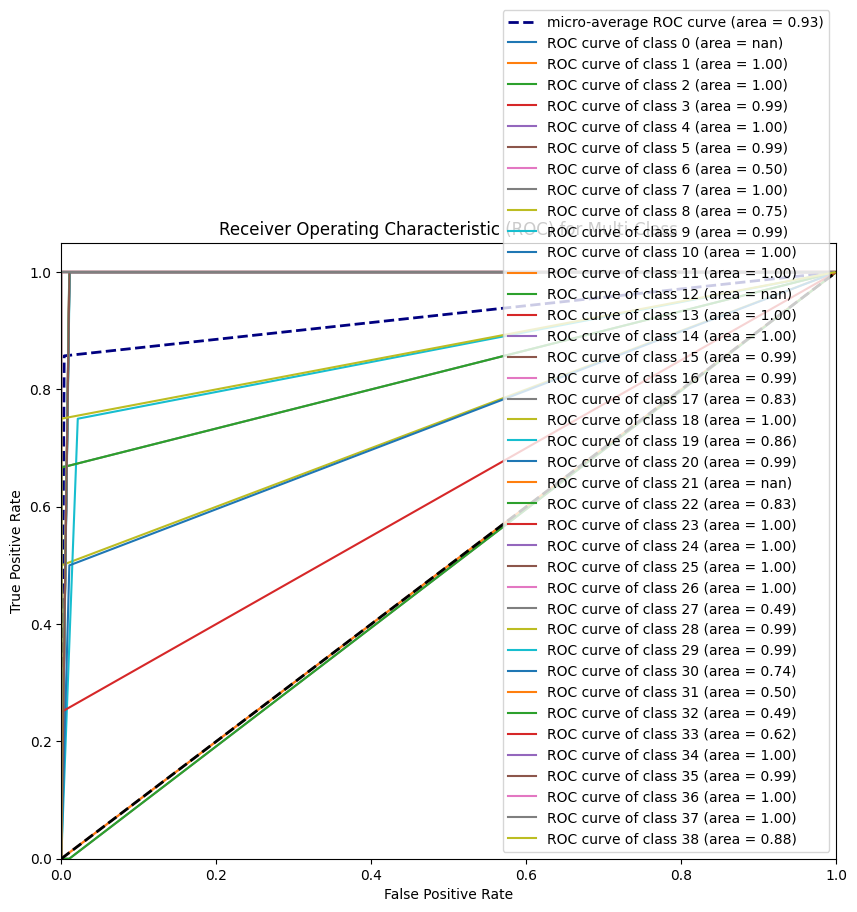

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

n_classes = 39
all_labels_binarized = label_binarize(all_labels, classes=range(n_classes))
all_preds_binarized = label_binarize(all_preds, classes=range(n_classes))


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_binarized[:, i], all_preds_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_binarized.ravel(), all_preds_binarized.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], color='navy', linestyle='--', linewidth=2,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linewidth=1.5,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()
